# Thermal Estimation of Power Electronic Converters

In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import normalize, minmax_scale
from sklearn.neural_network import MLPRegressor
import sklearn

import seaborn as sns

pd.set_option('display.max_colwidth',2000)

In [ ]:
!pip install rainflow
import rainflow
# https://pypi.org/project/rainflow/

In [ ]:
uploaded = files.upload()

Saving data375.xlsx to data375.xlsx


# Model Training

## Data Pre Processing

In [ ]:
# Load df and drop rows with missing values
df = pd.read_excel(io.BytesIO(uploaded['data375.xlsx']))
df = df.dropna()

# seperate response and predictors
x = df[['P_in','T_amb','V_dc','f_sw']]
y_mean = df['T_mean']
y_delta = df['T_delta']
print(x.shape)

# Normalize the data using Min-Max Scaling for feature range of [0,1]
x = minmax_scale(x, (0,1), axis=0)
#y_mean = minmax_scale(y_mean, (0,1), axis=0)
#y_delta = minmax_scale(y_delta, (0,1), axis=0)

x_train, x_test, y_mean_train, y_mean_test = train_test_split(x, y_mean, test_size=0.3)
x_train, x_test, y_delta_train, y_delta_test = train_test_split(x, y_mean, test_size=0.3)

model_output = {}
model_mse = []

print('Train Sets:', len(x_train))
print('Test Sets:', len(x_test))

(371, 4)
Train Sets: 259
Test Sets: 112


## Describe the data

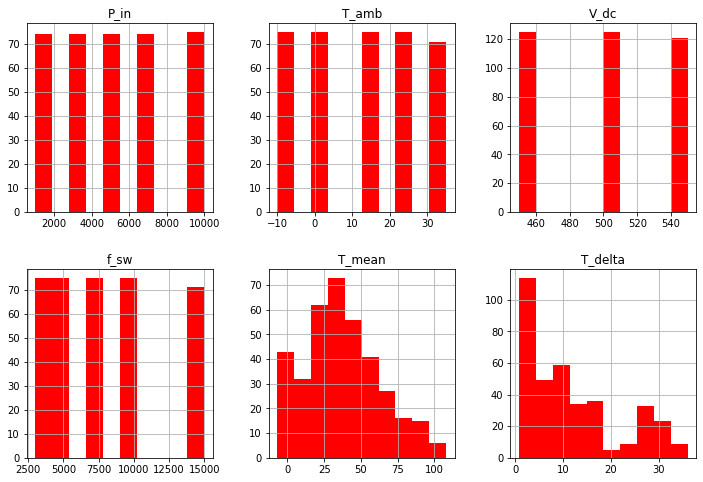

Text(20, 0, 'y=24.10+1.04*x')

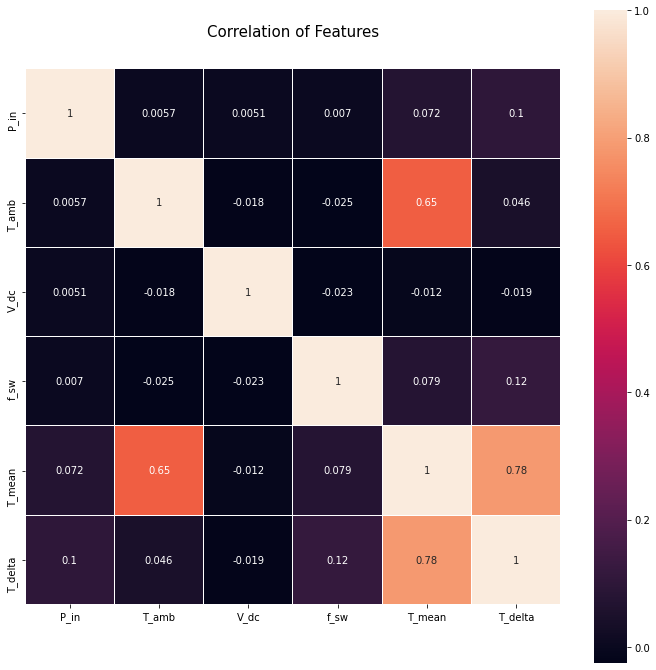

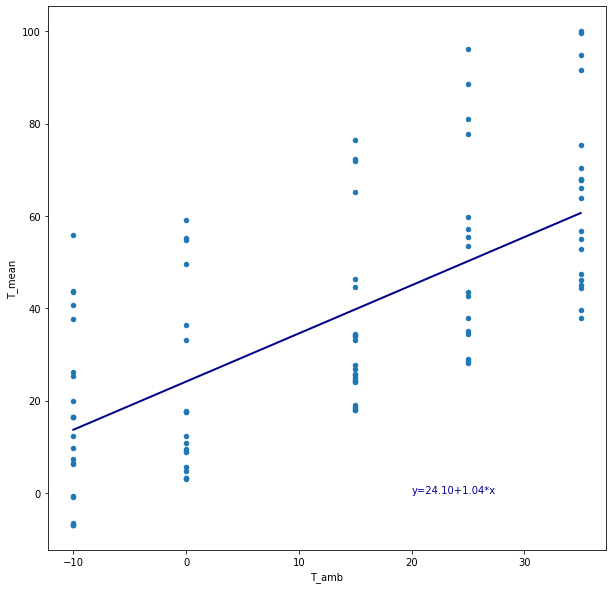

In [ ]:
df.head()
df.describe()
# df.shape

df.hist(figsize=(12,8), color='red', layout=(2,3))
plt.show()

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

fit = np.polyfit(df.T_amb, df.T_mean, 1)
df.sample(100).plot.scatter(x='T_amb', y='T_mean', figsize=(10,10))
plt.plot(df.T_amb, fit[0] * df.T_amb + fit[1], color='darkblue', linewidth=2)
plt.text(20,  0, 'y={:.2f}+{:.2f}*x'.format(fit[1], fit[0]), color='darkblue')


## Linear Regression

In [ ]:
model_mean = LinearRegression()
model_delta = LinearRegression()

model_mean.fit(x_train,y_mean_train)
model_delta.fit(x_train,y_delta_train)

lin_reg_mean = model_mean
lin_reg_delta = model_delta

y_mean_pred = model_mean.predict(x_test)
y_delta_pred = model_delta.predict(x_test)

# Reporting
model_output["linear_regression_mean"] = y_mean_pred
model_output["linear_regression_delta"] = y_delta_pred
model_mse.append(['linear_regression',mean_squared_error(y_mean_test, y_mean_pred), mean_squared_error(y_delta_test, y_delta_pred)])

print('Mean squared error Mean Model: %.4f'
      % mean_squared_error(y_mean_test, y_mean_pred))
print('Mean squared error Delta Model: %.4f'
      % mean_squared_error(y_delta_test, y_delta_pred))


Mean squared error Mean Model: 592.4910
Mean squared error Delta Model: 409.8008


## Bayesian Ridge

In [ ]:
model_mean = BayesianRidge()
model_delta = BayesianRidge()

model_mean.fit(x_train,y_mean_train)
model_delta.fit(x_train,y_delta_train)

bayes_mean = model_mean
bayes_delta = model_delta

y_mean_pred = model_mean.predict(x_test)
y_delta_pred = model_delta.predict(x_test)

# Reporting
model_output["bayesian_ridge_mean"] = y_mean_pred
model_output["bayesian_ridge_delta"] = y_delta_pred
model_mse.append(['bayesian_ridge',mean_squared_error(y_mean_test, y_mean_pred), mean_squared_error(y_delta_test, y_delta_pred)])

print('Mean squared error Mean Model: %.4f'
      % mean_squared_error(y_mean_test, y_mean_pred))
print('Mean squared error Delta Model: %.4f'
      % mean_squared_error(y_delta_test, y_delta_pred))

Mean squared error Mean Model: 578.5236
Mean squared error Delta Model: 407.4460


## Decision Tree

In [ ]:
model_mean = DecisionTreeRegressor()
model_delta = DecisionTreeRegressor()

model_mean.fit(x_train,y_mean_train)
model_delta.fit(x_train,y_delta_train)

dec_mean = model_mean
dec_delta = model_delta

y_mean_pred = model_mean.predict(x_test)
y_delta_pred = model_delta.predict(x_test)

# Reporting
model_output["decision_tree_mean"] = y_mean_pred
model_output["decision_tree_delta"] = y_delta_pred
model_mse.append(['decision_tree',mean_squared_error(y_mean_test, y_mean_pred), mean_squared_error(y_delta_test, y_delta_pred)])

print('Mean squared error Mean Model: %.4f'
      % mean_squared_error(y_mean_test, y_mean_pred))
print('Mean squared error Delta Model: %.4f'
      % mean_squared_error(y_delta_test, y_delta_pred))

text_representation = sklearn.tree.export_text(model_mean)
print(text_representation)


Mean squared error Mean Model: 1361.8032
Mean squared error Delta Model: 1.4916
|--- feature_2 <= 0.75
|   |--- feature_1 <= 0.67
|   |   |--- feature_1 <= 0.11
|   |   |   |--- feature_3 <= 0.79
|   |   |   |   |--- feature_2 <= 0.25
|   |   |   |   |   |--- feature_0 <= 0.56
|   |   |   |   |   |   |--- feature_3 <= 0.25
|   |   |   |   |   |   |   |--- feature_0 <= 0.33
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.08
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.11
|   |   |   |   |   |   |   |   |   |   |--- value: [42.36]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.11
|   |   |   |   |   |   |   |   |   |   |--- value: [52.66]
|   |   |   |   |   |   |   |   |--- feature_3 >  0.08
|   |   |   |   |   |   |   |   |   |--- value: [69.63]
|   |   |   |   |   |   |   |--- feature_0 >  0.33
|   |   |   |   |   |   |   |   |--- value: [18.16]
|   |   |   |   |   |   |--- feature_3 >  0.25
|   |   |   |   |   |   |   |--- feature_0 <= 0.33
|   |   |   |   |  

## SVM

In [ ]:
model_mean = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=.1)
model_delta = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=.1)

model_mean.fit(x_train,y_mean_train)
model_delta.fit(x_train,y_delta_train)

svm_mean = model_mean
svm_delta = model_delta

y_mean_pred = model_mean.predict(x_test)
y_delta_pred = model_delta.predict(x_test)

print(y_mean_pred)

# Reporting
model_output["svr_mean"] = y_mean_pred
model_output["svr_delta"] = y_delta_pred
model_mse.append(['svr',mean_squared_error(y_mean_test, y_mean_pred), mean_squared_error(y_delta_test, y_delta_pred)])


print('Mean squared error Mean Model: %.4f'
      % mean_squared_error(y_mean_test, y_mean_pred))
print('Mean squared error Delta Model: %.4f'
      % mean_squared_error(y_delta_test, y_delta_pred))

[35.71414392 30.99285053 37.91193223 44.45544884 30.00727031 34.81899154
 35.251859   42.04105801 38.20213178 37.24040876 41.39635958 42.23945195
 44.3066091  42.8892371  41.71989544 26.68535873 47.69582455 40.92526095
 45.69712957 45.63985895 37.47246044 33.37212423 41.77740136 32.90754309
 36.97084286 27.3011365  28.05137094 45.80506992 42.42350851 41.91051146
 26.46088238 34.14359249 37.40496852 24.44669976 40.46788847 31.96856547
 26.12338831 36.64071371 39.50458389 43.30932502 30.47640747 44.88434952
 43.77548058 31.85519041 40.38182343 47.97668766 32.2483965  22.13914735
 38.60819627 44.61806809 32.45085259 42.01923754 44.71038992 26.11633788
 41.83168447 45.09697665 27.04779381 37.84087598 38.74055895 34.29431029
 40.02884261 31.35271715 30.01401079 36.24791367 40.87400415 35.62250452
 34.69754343 43.41474404 44.72530936 31.54753165 29.13413881 34.16076788
 29.66528698 47.05890212 30.89096896 27.38627563 36.42270761 36.42278152
 36.83095303 39.80602205 26.09164489 42.13405173 44

## Neural Network

In [ ]:
model_mean = MLPRegressor(hidden_layer_sizes=(4, 5, 3, 1), activation='tanh',  solver='lbfgs')
model_delta = MLPRegressor(hidden_layer_sizes=(4, 5, 3, 1), activation='tanh',  solver='lbfgs')

model_mean.fit(x_train, y_mean_train)
model_delta.fit(x_train, y_delta_train)

dnn_mean = model_mean
dnn_delta = model_delta

y_mean_pred = model_mean.predict(x_test)
y_delta_pred = model_delta.predict(x_test)

print(y_mean_pred)
print(model_mean.score(x_test,y_mean_test))
# Reporting
model_output["dnn_mean"] = y_mean_pred
model_output["dnn_delta"] = y_delta_pred
model_mse.append(['dnn',mean_squared_error(y_mean_test, y_mean_pred), mean_squared_error(y_delta_test, y_delta_pred)])

print('Mean squared error Mean Model: %.4f'
      % mean_squared_error(y_mean_test, y_mean_pred))
print('Mean squared error Delta Model: %.4f'
      % mean_squared_error(y_delta_test, y_delta_pred)) 

[38.82526951 38.82526426 38.82526522 38.82526874 38.82526845 38.82526492
 38.82526752 38.82526866 38.82526851 38.82526269 38.82526966 38.82526929
 38.82526898 38.82526822 38.82526947 38.82526273 38.82526982 38.8252695
 38.82526953 38.82526965 38.82526899 38.82526893 38.8252683  38.8252612
 38.82526666 38.82526836 38.82526965 38.82526978 38.82526784 38.82526916
 38.82526914 38.82526774 38.82526706 38.82525895 38.82526962 38.82526983
 38.82526402 38.82526392 38.82527014 38.82526905 38.82525954 38.82527023
 38.82526901 38.82526807 38.82526423 38.82526965 38.82526227 38.82526379
 38.82526685 38.82526937 38.82526688 38.82526982 38.82526967 38.82526734
 38.82526947 38.82527026 38.82526891 38.8252689  38.82526868 38.82526593
 38.82526523 38.82526496 38.82526016 38.82526754 38.82526961 38.82526258
 38.82526826 38.82526998 38.82526985 38.82526919 38.8252679  38.82526831
 38.82526995 38.82526999 38.8252694  38.82526813 38.82526825 38.82526939
 38.82526925 38.82527012 38.82526707 38.82526996 38.8

## Data Post Processing

In [ ]:
model_mse = np.array(model_mse).T

   linear_regression  bayesian_ridge  decision_tree         svr         dnn
0         592.491020      578.523605    1361.803165  605.087026  571.448022
1         409.800769      407.446039       1.491586  340.088515  565.245218


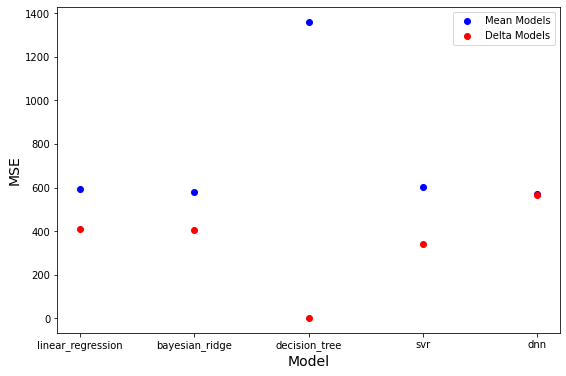

In [ ]:
plot_data = pd.DataFrame(model_mse[1:3], columns=model_mse[0]).astype(float)
print(plot_data)
fig, ax = plt.subplots(figsize=(9, 6))  # a figure with a single Axes
ax.set_xlabel('Model', fontdict={"size": 14})  # Add an x-label to the axes.
ax.set_ylabel('MSE', fontdict={"size": 14})  # Add a y-label to the axes.
plt.xticks(range(1,6), list(plot_data.columns))
ax.scatter(x=range(1,6), y=plot_data.loc[0], c="blue")
ax.scatter(x=range(1,6), y=plot_data.loc[1], c="red")
ax.legend(["Mean Models", "Delta Models"])

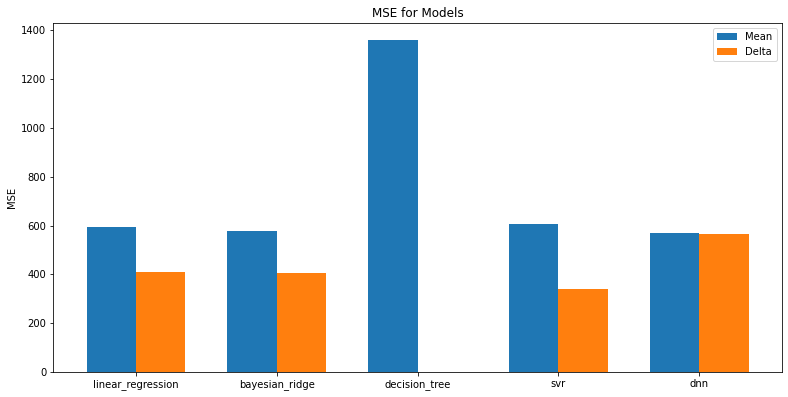

In [ ]:
x = np.arange(len(model_mse[0]))
width = 0.35 

labels = model_mse[0]
means = model_mse[1].astype(np.float)
deltas = model_mse[2].astype(np.float)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means, width, label='Mean')
rects2 = ax.bar(x + width/2, deltas, width, label='Delta')
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(labels)
ax.legend()
plt.title("MSE for Models") 
ax.set_ylabel('MSE')  # Add a y-label to the axes.
fig.tight_layout()
fig.set_size_inches(12, 6)


# Rainflow-Counting Algorithm

linear_regression_mean
[(0.4052429651166136, 0.5), (0.7370042221236375, 1.0), (1.9512471141933432, 1.0), (2.708869566080054, 1.0), (2.7961001986598646, 1.0), (2.9620297436797145, 1.0), (3.206534909019254, 1.0), (3.256900294788373, 0.5), (3.4638492834767405, 1.0), (3.865628981576009, 1.0), (4.058731212761479, 1.0), (4.137704369800986, 0.5), (4.230126747623572, 1.0), (4.778797487997011, 1.0), (5.26780781867609, 1.0), (6.510709400191537, 1.0), (6.965254743604646, 0.5), (7.095207838990731, 1.0), (7.1741809960302305, 1.0), (7.56359993990673, 1.0), (8.335069149296338, 1.0), (8.919542129007837, 1.0), (9.21653869506175, 1.0), (9.684756585682045, 1.0), (10.209743365994889, 1.0), (10.950453330081181, 1.0), (11.09427864205783, 0.5), (11.413628226666724, 1.0), (12.585814126682976, 0.5), (13.041397018481028, 1.0), (13.09826594247734, 1.0), (13.449705713895163, 0.5), (13.49072515756368, 1.0), (14.030075414924195, 1.0), (14.565296934514567, 0.5), (14.861205034008172, 1.0), (14.902224477676686, 1.0), 

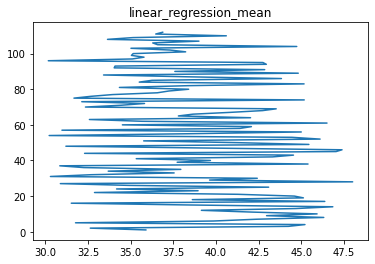

linear_regression_delta
[(0.18306712035104056, 1.0), (1.7969425056806756, 1.0), (1.9222673607645788, 1.0), (3.2277507706592843, 1.0), (5.223177727104172, 1.0), (5.514572022299959, 1.0), (11.825788634696316, 1.0), (12.250168724056863, 1.0), (13.781990586130135, 1.0), (18.710899909908196, 1.0), (19.672033590290486, 1.0), (21.953625197398395, 1.0), (22.029598131399936, 1.0), (22.405069113260318, 1.0), (24.383498389466045, 1.0), (25.380650593734885, 1.0), (25.838175098851636, 1.0), (29.782933242562493, 1.0), (30.058180802241214, 1.0), (31.03023157360783, 0.5), (31.672056187570867, 1.0), (33.30084531992233, 1.0), (34.55545722871774, 0.5), (36.660791709833376, 1.0), (36.84227848035841, 1.0), (37.66396373354798, 1.0), (39.19376243221301, 0.5), (39.2669220278933, 0.5), (40.1860173649433, 1.0), (41.39938110531939, 1.0), (43.94726557472087, 1.0), (44.57496661657508, 1.0), (45.68646581513441, 0.5), (46.86178786821574, 0.5), (48.54274225997084, 1.0), (51.00863397592502, 0.5), (53.30637231855001, 1

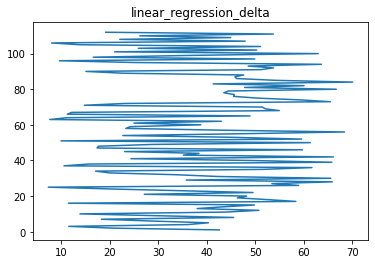

bayesian_ridge_mean
[(0.06913677374878802, 0.5), (0.7560662988761564, 1.0), (0.9543979269958811, 1.0), (1.4946496516906222, 1.0), (1.5853856022923338, 1.0), (1.6012000948662717, 1.0), (1.6646279679816587, 1.0), (2.1502403521788835, 1.0), (2.2460290987508813, 0.5), (2.47438249218704, 1.0), (2.5104081686420585, 0.5), (2.5205137605825954, 1.0), (2.6450169131411982, 1.0), (3.010237525574631, 1.0), (3.350194158156718, 1.0), (3.8347893435328757, 1.0), (4.206374961262817, 1.0), (4.340983705761971, 1.0), (4.5662477672208155, 0.5), (4.806018961923748, 1.0), (5.170583469694066, 1.0), (5.35637627855904, 1.0), (5.6268350432343865, 1.0), (5.765179524381146, 1.0), (6.085505294099654, 1.0), (6.796391439748561, 1.0), (6.825761950398309, 1.0), (6.836233486493214, 0.5), (7.566018606696957, 0.5), (7.69681098090647, 1.0), (7.716441843770035, 1.0), (7.940688706407805, 0.5), (7.951450403011471, 1.0), (8.371671450100358, 1.0), (8.71668087865271, 0.5), (8.841764352228829, 0.5), (8.886003090280632, 1.0), (8.89

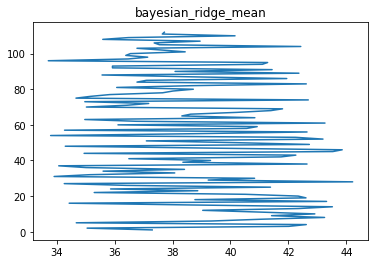

bayesian_ridge_delta
[(0.20764570475831334, 1.0), (1.7697759162205386, 1.0), (1.88761947278266, 1.0), (3.1242604229244435, 1.0), (5.124816371377719, 1.0), (5.398309703249588, 1.0), (11.613640969554893, 1.0), (12.11058896004942, 1.0), (13.526569330623207, 1.0), (18.34274553438614, 1.0), (19.28655527077747, 1.0), (21.57696882261478, 1.0), (21.646369163416836, 1.0), (22.0080454003215, 1.0), (23.956605419326213, 1.0), (24.946440078759032, 1.0), (25.45426615655213, 1.0), (29.27657016500026, 1.0), (29.591181339022114, 1.0), (30.51023750477562, 0.5), (31.153311550484332, 1.0), (32.74672165663929, 1.0), (33.98474075965832, 0.5), (36.0800059371993, 1.0), (36.25879003998347, 1.0), (37.06790712610702, 1.0), (38.541854432536454, 0.5), (38.65479090820706, 0.5), (39.554509192081994, 1.0), (40.76286764357171, 1.0), (43.2559960336016, 1.0), (43.88222098560465, 1.0), (44.93596980162593, 0.5), (46.15627026592979, 0.5), (47.75458745297625, 1.0), (50.18024897272917, 0.5), (52.4295446824165, 1.0), (54.4301

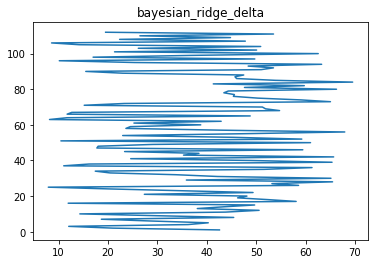

decision_tree_mean
[(0.3754567678225982, 1.0), (4.1566476493871996, 1.0), (6.658950430598697, 1.0), (10.455205911855394, 1.0), (12.779556476090601, 1.0), (14.177969382815299, 1.0), (14.783954519600222, 1.0), (15.922710387545393, 1.0), (16.651056718458094, 1.0), (18.91284766014188, 1.0), (19.47526120747319, 1.0), (19.7371513230946, 1.0), (20.307327605602907, 0.5), (24.3363570217657, 1.0), (24.72892178889013, 1.0), (24.988524860804997, 1.0), (28.92534805126638, 1.0), (34.869839479761104, 1.0), (40.01246500032422, 1.0), (44.509224192614, 1.0), (47.240625445757516, 1.0), (48.363831687261396, 1.0), (48.55693931637379, 1.0), (52.992279989170385, 1.0), (53.50734181761341, 1.0), (56.6595002396226, 1.0), (58.325823839157, 1.0), (58.3559798750421, 1.0), (59.7579681410444, 1.0), (70.87776676240368, 1.0), (70.947602688285, 1.0), (72.77845785311938, 1.0), (83.91636524679782, 0.5), (84.959581446087, 1.0), (86.36884968253511, 0.5), (86.80728509939078, 0.5), (96.2557472740471, 1.0), (99.05552378136254

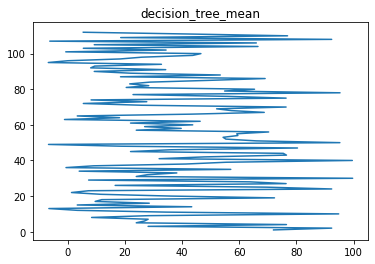

decision_tree_delta
[(5.280320767504602, 1.0), (7.864006766340097, 1.0), (8.964314053329499, 0.5), (9.750412107454899, 1.0), (11.5460100391752, 1.0), (12.448315559582799, 0.5), (14.776993823024995, 1.0), (14.964779098059097, 1.0), (16.589273476441, 1.0), (19.059453442328, 1.0), (19.542562546619102, 1.0), (21.301821556478103, 1.0), (21.492728159554, 1.0), (22.136773333920797, 1.0), (22.436729888122603, 1.0), (23.48972825766068, 0.5), (25.627744736215, 1.0), (26.600941341230904, 1.0), (28.156290018508702, 1.0), (29.2161537271492, 1.0), (32.788550278705, 1.0), (35.3962688664631, 1.0), (37.6244388153944, 1.0), (41.908957666333606, 1.0), (43.5136644273079, 1.0), (44.562232271572796, 1.0), (46.546714574600195, 1.0), (51.012321774291905, 1.0), (52.47616103530291, 1.0), (53.0785412474726, 1.0), (58.8936246003879, 1.0), (58.9988709792369, 0.5), (65.08731562631668, 1.0), (68.18691087322817, 1.0), (76.04865248860088, 0.5), (78.81749832881557, 0.5), (80.78926293906201, 1.0), (82.70793048684502, 1.

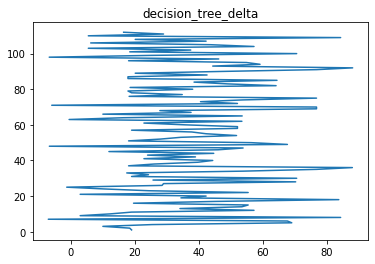

svr_mean
[(1.0335401322026598, 1.0), (1.1066523728072895, 0.5), (4.063299764953342, 1.0), (4.446248660927878, 1.0), (4.495480906901232, 1.0), (4.7212933888998485, 0.5), (4.771868613232158, 1.0), (4.800649253928924, 1.0), (5.221150985334798, 1.0), (5.887268481164583, 1.0), (5.999989121953092, 1.0), (6.176460716186071, 1.0), (8.23869914469044, 0.5), (8.405277129935797, 1.0), (8.842189980676835, 1.0), (10.014831816941207, 1.0), (10.053213521532896, 1.0), (10.944086142916344, 1.0), (11.197451566183101, 1.0), (12.167215502526616, 1.0), (12.419746413352438, 1.0), (12.832917551911077, 1.0), (13.02915911490184, 1.0), (13.462598312543445, 0.5), (14.299338792953616, 1.0), (14.344500157230836, 1.0), (15.59117055086666, 1.0), (15.816132266798544, 1.0), (16.540644520867286, 0.5), (17.770090110567434, 0.5), (18.04918283441577, 1.0), (18.061782260535534, 1.0), (18.503933412011744, 1.0), (18.594052042896333, 1.0), (20.546861283127182, 0.5), (21.010465814205585, 0.5), (21.737288699635013, 0.5), (23.249

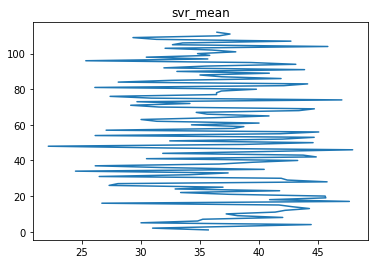

svr_delta
[(0.18918293485569393, 1.0), (4.789618669254395, 1.0), (7.727201332748933, 1.0), (8.509369041288139, 1.0), (11.744051478736239, 1.0), (12.359998463793573, 1.0), (15.853739831524251, 1.0), (18.01275350296561, 1.0), (18.07713675385193, 1.0), (19.75790508363513, 1.0), (20.12269596609383, 1.0), (22.433790449744393, 1.0), (23.651199211851065, 1.0), (25.42070197984458, 1.0), (25.447208952830735, 1.0), (27.21804217391248, 1.0), (28.432541307044858, 1.0), (29.08676997542109, 1.0), (31.05111130248015, 1.0), (34.400794784468445, 1.0), (34.76863124381377, 0.5), (36.53021544983707, 0.5), (37.537159995077616, 1.0), (39.18842195155503, 1.0), (39.373369463512496, 1.0), (40.15119931253086, 1.0), (41.55235742505437, 1.0), (42.274049511935814, 1.0), (43.186716514367234, 1.0), (44.054384041089364, 1.0), (44.425638870738446, 1.0), (47.485555622264286, 0.5), (50.09142116425821, 0.5), (50.84088082118628, 1.0), (51.71514781147909, 1.0), (55.994944977826314, 1.0), (60.372748804871414, 0.5), (62.2843

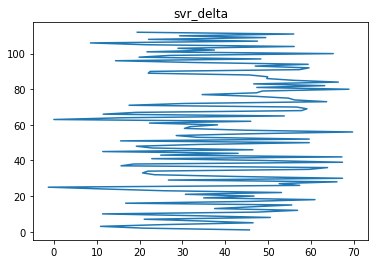

dnn_mean
[(1.3940410781287937e-07, 1.0), (1.537170675192101e-07, 1.0), (3.8066703922368106e-07, 1.0), (5.571240464519178e-07, 1.0), (1.2422768662645467e-06, 1.0), (1.3238974361229339e-06, 1.0), (1.8647371433644366e-06, 1.0), (2.0827323723437985e-06, 1.0), (2.220145383091676e-06, 0.5), (2.3201151932994435e-06, 1.0), (2.4716814479575078e-06, 1.0), (2.483980459544455e-06, 1.0), (2.702811116250814e-06, 1.0), (2.8932480091725665e-06, 1.0), (3.26939054673403e-06, 1.0), (3.743103434317163e-06, 1.0), (3.888156449249891e-06, 1.0), (4.479723330064189e-06, 1.0), (4.607923557387039e-06, 1.0), (5.159970818624515e-06, 1.0), (5.413390063324641e-06, 1.0), (5.913525384926288e-06, 1.0), (6.815354133493656e-06, 0.5), (6.925154089287844e-06, 1.0), (7.025135097649127e-06, 1.0), (7.1283169162938975e-06, 0.5), (7.400439493210342e-06, 0.5), (7.643552542901944e-06, 0.5), (7.953172094232741e-06, 1.0), (8.582344541707698e-06, 1.0), (9.956703841851322e-06, 0.5), (1.0101535892204083e-05, 0.5), (1.0604017717241732e

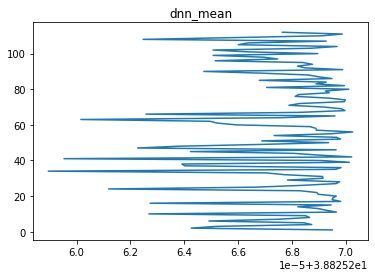

dnn_delta
[(6.501466032204917e-11, 1.0), (1.099635937862331e-10, 1.0), (1.2220624512337963e-10, 1.0), (1.355289214188815e-10, 1.0), (1.4485834753941162e-10, 1.0), (1.4770762390980963e-10, 1.0), (1.8914647625933867e-10, 1.0), (2.3062085574565572e-10, 1.0), (3.012488036802097e-10, 1.0), (3.0600944000980235e-10, 1.0), (3.6577318951458437e-10, 1.0), (3.930722414224874e-10, 1.0), (4.26986446200317e-10, 1.0), (4.857056978835317e-10, 1.0), (5.39301936441916e-10, 1.0), (5.408011816143699e-10, 1.0), (5.71375835534127e-10, 1.0), (5.850253614880785e-10, 1.0), (6.28254781531723e-10, 1.0), (6.523990236928512e-10, 1.0), (6.660343387920875e-10, 1.0), (6.907541205691814e-10, 1.0), (6.973905897211807e-10, 1.0), (6.988756240389193e-10, 1.0), (7.71770203300548e-10, 1.0), (8.055494049585832e-10, 0.5), (9.588916327629704e-10, 1.0), (1.0090133173434879e-09, 1.0), (1.0357368296354252e-09, 1.0), (1.1063221450058336e-09, 1.0), (1.4053185282136837e-09, 1.0), (2.080724925690447e-09, 0.5), (2.1407657868621754e-09

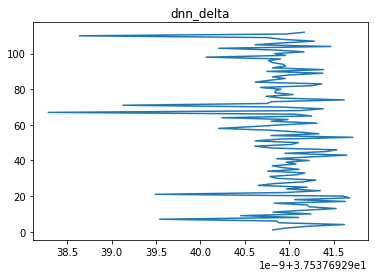

In [ ]:
# Print keys of stored output data 
# Access values for array of model output values
for key, values in model_output.items():
  print(key)
  plt.title(key) 
  plt.plot(values, range(1,len(values)+1))
  print(rainflow.count_cycles(values))
  plt.show()

# Import Temp/Irradiance Data



In [ ]:
uploaded_aalborg_solaryear = files.upload()
uploaded_aalborg_ambienttemp = files.upload()
aalborg_solaryear = pd.read_csv(io.BytesIO(uploaded_aalborg_solaryear['aalborg_solaryear.csv']), encoding='utf8', names=["Solar Irradiance"])
aalborg_ambienttemp = pd.read_csv(io.BytesIO(uploaded_aalborg_ambienttemp['aalborg_ambienttemp.csv']), encoding='utf8', names=["Ambient Temp"])

TypeError: ignored

In [ ]:
labels = ['Oct', 'Nov', 'Dec', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
loc = [0, 9175.1, 18350, 27525,36700, 45875, 55051, 64226, 73401, 82576, 91751, 100930]
ax = aalborg_solaryear.plot(c="red")
ax.get_legend().remove()
plt.grid(which='major',axis='both',linewidth=0.25)
plt.ylabel('Solar Irradiance ($W/m^2$)')
plt.xticks(loc,labels)
plt.xlabel('Time (months)')
plt.xlim(0,110101)
plt.ylim(0,1500)
ax = aalborg_ambienttemp.plot()
plt.grid(which='major',axis='both', linewidth=0.25)
plt.xticks(loc,labels)
plt.xlim(0,110101)
plt.xlabel('Time (months)')
ax.get_legend().remove()
plt.ylabel('Ambient Temp ($^\circ$C)')


In [ ]:
P_in = (aalborg_solaryear['Solar Irradiance'])
T_amb = aalborg_ambienttemp['Ambient Temp']

P_in = minmax_scale(P_in, (0,1), axis=0)
T_amb = minmax_scale(T_amb,(0,1), axis=0)

V_dc = np.ones((110101,))    # gives 1 for the normalized voltages
f_sw = np.ones((110101,))    # gives 1 for normalized switching frequencies

x_final = pd.DataFrame(data=[P_in,T_amb,V_dc,f_sw]).T

T_mean_pred = dnn_mean.predict(x_final)
T_delta_pred = dnn_delta.predict(x_final)

mean_cycles = rainflow.count_cycles(T_mean_pred)
delta_cycles = 50*60*5*len(P_in)

cycle_total = 0
for i in range(len(mean_cycles)):
  cycle_total += mean_cycles[i][1]

print(cycle_total)

In [ ]:
# Linear Regression Cycle Counting
T_mean_pred = lin_reg_mean.predict(x_final)

mean_cycles = rainflow.count_cycles(T_mean_pred)

l_cycle_total = 0
for i in range(len(mean_cycles)):
  l_cycle_total += mean_cycles[i][1]

print(l_cycle_total)

In [ ]:
# Bayesian Ridge Cycle Counting
T_mean_pred = bayes_mean.predict(x_final)

mean_cycles = rainflow.count_cycles(T_mean_pred)

b_cycle_total = 0
for i in range(len(mean_cycles)):
  b_cycle_total += mean_cycles[i][1]

print(b_cycle_total)

In [ ]:
# Decision Tree Cycle Counting
T_mean_pred = dec_mean.predict(x_final)

mean_cycles = rainflow.count_cycles(T_mean_pred)

d_cycle_total = 0
for i in range(len(mean_cycles)):
  d_cycle_total += mean_cycles[i][1]

print(d_cycle_total)

In [ ]:
# SVM Cycle Counting
T_mean_pred = svm_mean.predict(x_final)

mean_cycles = rainflow.count_cycles(T_mean_pred)

s_cycle_total = 0
for i in range(len(mean_cycles)):
  s_cycle_total += mean_cycles[i][1]

print(s_cycle_total)

In [ ]:
# Neural Net Cycle Counting
T_mean_pred = dnn_mean.predict(x_final)

mean_cycles = rainflow.count_cycles(T_mean_pred)

n_cycle_total = 0
for i in range(len(mean_cycles)):
  n_cycle_total += mean_cycles[i][1]

print(n_cycle_total)